In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
def plot_gaussian(mean,std,name,colour):
    x=np.linspace(0,100,1000)
    y = (1/(((2*np.pi)**0.5)*std)) * np.exp(-0.5*((x-mean)/std)**2)
    #y=norm.pdf(x,mean,std)
    data=np.array([x,y])
    data=data.T
    plt.plot(x,y,label=name,color=colour)
    plt.legend()
    return data

In [4]:
def FPR_FNR(genuine,imposter,threshold):
    #FP=np.sum(imposter<=threshold)
    #FPR=FP/len(imposter)
    FPR=norm.cdf(threshold,60,15**0.5)
    FNR=1-norm.cdf(threshold,30,10**0.5)
    return FPR,FNR

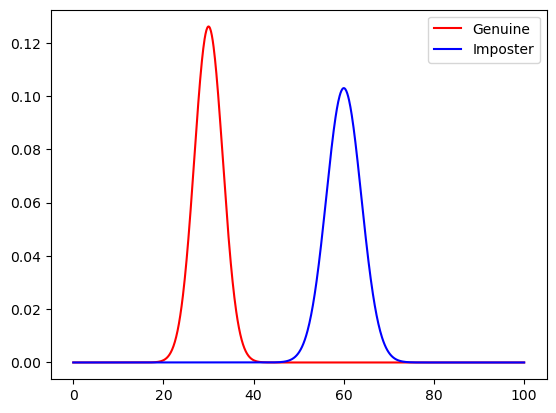

In [5]:
#(a)
genuine=plot_gaussian(30,10**0.5,'Genuine','red')
imposter=plot_gaussian(60,15**0.5,'Imposter','blue')

In [6]:
#rule---> if score<=n ---> genuine otherwise imposter
#(b)
n=50
FPR,FNR=FPR_FNR(genuine[:,0],imposter[:,0],n)
print('For n=50:')
print('FMR:',FPR)
print('FNMR:',FNR)

For n=50:
FMR: 0.004911637253759624
FNMR: 1.269814253745949e-10


In [7]:
#(c)
n=75
FPR,FNR=FPR_FNR(genuine[:,0],imposter[:,0],n)
print('For n=75:')
print('FMR:',FPR)
print('FNMR:',FNR)

For n=75:
FMR: 0.9999462444116353
FNMR: 0.0


In [8]:
def get_DET_curve(genuine,imposter):
    FPR_array=[]
    FNR_array=[]
    for n in range(1,100):
        FPR,FNR=FPR_FNR(genuine,imposter,n)
        FPR_array.append(FPR)
        FNR_array.append(FNR)
    plt.plot(FPR_array[:],FNR_array[:])
    plt.title('DET CURVE')
    plt.xlabel('FPR')
    plt.ylabel('FNR')
    plt.autoscale()

def get_ROC_curve(genuine,imposter):
    FPR_array=[]
    TPR_array=[]
    for n in range(1,100):
        FPR,FNR=FPR_FNR(genuine,imposter,n)
        FPR_array.append(FPR)
        TPR_array.append(1-FNR)
    plt.plot(FPR_array[:],TPR_array[:])
    plt.title('ROC CURVE')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.autoscale()

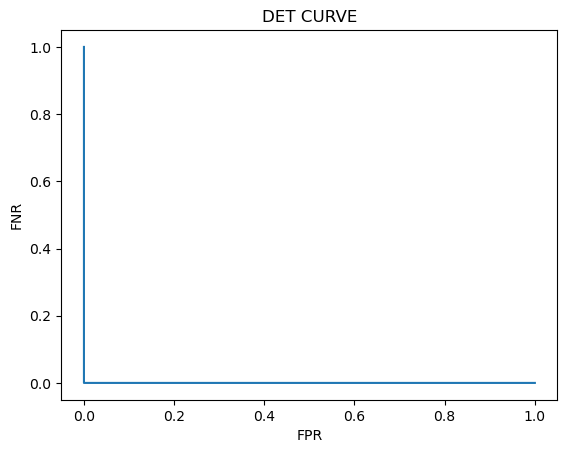

In [9]:
#(d)
#DET CURVE: FPR Vs FNR graph
get_DET_curve(genuine[:,0],imposter[:,0])

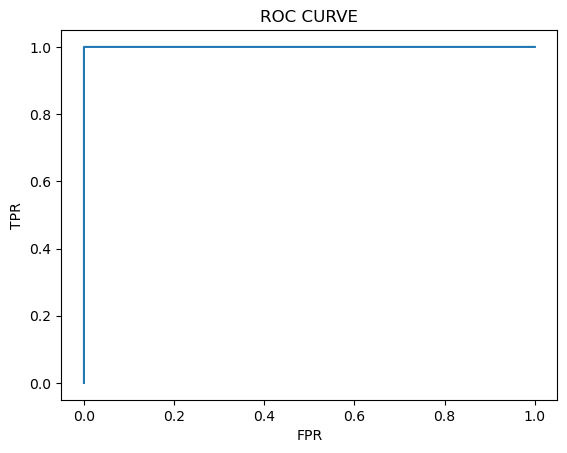

In [10]:
#ROC CURVE: TPR Vs FPR graph
get_ROC_curve(genuine[:,0],imposter[:,0])